In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/xAPI-Edu-Data/xAPI-Edu-Data.csv


In [2]:
import pandas as pd
df = pd.read_csv("../input/xAPI-Edu-Data/xAPI-Edu-Data.csv")

In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import seaborn as sb
%matplotlib inline

In [4]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.9+ KB


In [6]:
df[['gender','NationalITy','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays','Class']].iloc[1:20]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,Yes,Good,Under-7,M
10,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,Yes,Good,Under-7,H


In [7]:
df_encode = df.copy(deep = True)

label_encode = LabelEncoder()

gender_encode = label_encode.fit_transform(df_encode['gender'])
nationality_encode = label_encode.fit_transform(df_encode['NationalITy'])
PlaceofBirth_encode = label_encode.fit_transform(df_encode['PlaceofBirth'])
StageID_encode = label_encode.fit_transform(df_encode['StageID'])
GradeID_encode = label_encode.fit_transform(df_encode['GradeID'])
SectionID_encode = label_encode.fit_transform(df_encode['SectionID'])
Topic_encode = label_encode.fit_transform(df_encode['Topic'])
Semester_encode = label_encode.fit_transform(df_encode['Semester'])
Relation_encode = label_encode.fit_transform(df_encode['Relation'])
ParentAnsweringSurvey_encode = label_encode.fit_transform(df_encode['ParentAnsweringSurvey'])
ParentschoolSatisfaction_encode = label_encode.fit_transform(df_encode['ParentschoolSatisfaction'])
StudentAbsenceDays_encode = label_encode.fit_transform(df_encode['StudentAbsenceDays'])
Class_encode = label_encode.fit_transform(df_encode['Class'])

df_encode['gender_encode'] = gender_encode
df_encode['nationality_encode'] = nationality_encode
df_encode['PlaceofBirth_encode'] = PlaceofBirth_encode
df_encode['StageID_encode'] = StageID_encode
df_encode['GradeID_encode'] = GradeID_encode
df_encode['SectionID_encode'] = SectionID_encode
df_encode['Topic_encode'] = Topic_encode
df_encode['Semester_encode'] = Semester_encode
df_encode['Relation_encode'] = Relation_encode
df_encode['ParentAnsweringSurvey_encode'] = ParentAnsweringSurvey_encode
df_encode['ParentschoolSatisfaction_encode'] = ParentschoolSatisfaction_encode
df_encode['StudentAbsenceDays_encode'] = StudentAbsenceDays_encode
df_encode['Class_encode'] = Class_encode

In [8]:
df_encode.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,StageID_encode,GradeID_encode,SectionID_encode,Topic_encode,Semester_encode,Relation_encode,ParentAnsweringSurvey_encode,ParentschoolSatisfaction_encode,StudentAbsenceDays_encode,Class_encode
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,...,2,1,0,7,0,0,1,1,1,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,...,2,1,0,7,0,0,1,1,1,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,...,2,1,0,7,0,0,0,0,0,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,...,2,1,0,7,0,0,0,0,0,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,...,2,1,0,7,0,0,0,0,0,2


In [9]:
cols = ['gender',
        'NationalITy',
        'PlaceofBirth',
        'StageID',
        'GradeID',
        'SectionID',
        'Topic',
        'Semester',
        'Relation',
        'ParentAnsweringSurvey',
        'ParentschoolSatisfaction',
        'StudentAbsenceDays',
        'Class']
df_encode.drop(cols, inplace=True, axis=1)

In [10]:
corr_mat = df_encode.corr()
corr_mat['Class_encode'].sort_values(ascending=False)

Class_encode                       1.000000
gender_encode                      0.123675
Topic_encode                       0.103610
SectionID_encode                   0.017597
GradeID_encode                     0.013483
StageID_encode                    -0.011696
Semester_encode                   -0.043287
nationality_encode                -0.077785
PlaceofBirth_encode               -0.098975
Discussion                        -0.121971
ParentAnsweringSurvey_encode      -0.123254
AnnouncementsView                 -0.143996
ParentschoolSatisfaction_encode   -0.146277
VisITedResources                  -0.161748
StudentAbsenceDays_encode         -0.199083
raisedhands                       -0.231016
Relation_encode                   -0.272111
Name: Class_encode, dtype: float64

In [11]:
X = df_encode.drop('Class_encode',axis=1)
y= df_encode['Class_encode'].ravel()
X_Train, X_Test, y_train, y_test = train_test_split(X, y, random_state =42, test_size=0.2)

In [12]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_Train, y_train)
sgd_pred = sgd_clf.predict(X_Train)
precision_score(y_train, sgd_pred, average=None), recall_score(y_train, sgd_pred, average=None)

(array([0.45887446, 0.89795918, 0.47115385]),
 array([0.88333333, 0.43564356, 0.3006135 ]))

In [13]:
sgd_clf_crs = SGDClassifier()
cross_val_pred = cross_val_predict(sgd_clf_crs, X_Train, y_train, cv=5)

In [14]:
print("Precision Score : ",precision_score(y_train, cross_val_pred, average=None))
print("Recall Score : ",recall_score(y_train, cross_val_pred, average=None))
print("f1 score : ",f1_score(y_train, cross_val_pred, average=None))

Precision Score :  [0.46357616 0.56338028 0.46153846]
Recall Score :  [0.58333333 0.79207921 0.25766871]
f1 score :  [0.51660517 0.65843621 0.33070866]


In [15]:
forest = RandomForestClassifier(n_estimators =10)
cros_val_forest = cross_val_predict(forest, X_Train, y_train, cv=3)


In [16]:
print("Precision Score : ",precision_score(y_train, cros_val_forest, average=None))
print("Recall Score : ",recall_score(y_train, cros_val_forest, average=None))
print("f1 score : ",f1_score(y_train, cros_val_forest, average=None))

Precision Score :  [0.69924812 0.83168317 0.71333333]
Recall Score :  [0.775      0.83168317 0.65644172]
f1 score :  [0.73517787 0.83168317 0.68370607]


In [17]:
forest.fit(X_Train, y_train)
forest_pred = forest.predict(X_Train)
print("Precision Score : ",precision_score(y_train, forest_pred, average=None))
print("Recall Score : ",recall_score(y_train, forest_pred, average=None))
print("f1 score : ",f1_score(y_train, forest_pred, average=None))

Precision Score :  [1.         0.98039216 0.98170732]
Recall Score :  [0.98333333 0.99009901 0.98773006]
f1 score :  [0.99159664 0.98522167 0.98470948]


In [18]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [19]:
multiclass_roc_auc_score(y_train, forest_pred)

0.9900867676902242

In [20]:
forest_test_pred = forest.predict(X_Test)
multiclass_roc_auc_score(y_test, forest_test_pred)


0.8329036204036204

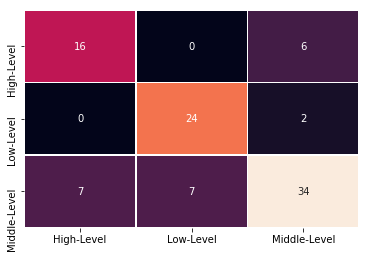

In [21]:
conf_matrix = confusion_matrix(y_test, forest_test_pred)
#df_label = df.pivot("Class")
x_label = ["High-Level","Low-Level","Middle-Level"]
y_label = ["High-Level","Low-Level","Middle-Level"]
sb.heatmap(conf_matrix, annot=True, linewidths = 0.5, cbar=False, xticklabels =  x_label, yticklabels = y_label)